# Battle of the neighborhoods - Montreal edition

## Table of Contents


1. [Introduction](#introduction)
2. [Data Description](#Data)
3. [Methodology](#Methodology)
4. [Results](#Results)  
    a. [Explore Neighborhoods in Montreal](#Explore)  
    b. [Analyze Each Neighborhood](#Analyze)  
    c. [Cluster Neighborhoods](#Clustering)  
    d. [Processing the Housing Data](#Housing)  
    e. [Generating the choropleth map of Montreal neighborhoods by house prices and visualizing the clusters in those neighborhoods](#Choropleth)  
    e. [Examine clusters](#Examine)  
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)

## 1. Introduction <a name="introduction"></a>

In this project, my aim is to cluster the neighborhoods of Montreal to identify the clusters of neighborhoods with similar characteristics. Then, based on the average home prices in each neighborhood, I will attempt to see whether there would be any neighborhoods with lower house prices among those clusters. 

Montreal’s housing market is considered to be one of the most affordable among major Canadian cities and knowing where to buy a house would maximize the return on the investment. The decision to choose where to buy the house would depend on two factors. First, the price of the house has to be affordable. Secondly, the neighborhood should have a wide selection of venues and restaurants. An ideal house would thus be the one from a neighbourhood with relatively lower prices, while at the same time, with a broader choice of venues and restaurants around. 


While Montreal offers a wide selection of neighborhoods and housing, the problem becomes choosing the house in a neighborhood that will strike a perfect balance between affordability and social life. The results from my analysis aim to help the people who are new to the city and are looking to buy property. 

## 2. Data Description <a name="Data"></a>


I obtained coordinates of the neighborhoods of Montreal and their boundaries from the City of Montreal website. The Json file with this data will be used to generate the maps and to segment the neighborhoods so that they can be explored  .

I will use the Foursquare API to explore the neighborhoods and to obtain the list of the venues in them. This data will be crucial in creating clusters of neighborhoods. 

The data for housing prices by neighborhoods in Montreal is available online. This data will be used to cluster the neighborhoods by average price of a home  . 


## 3.  Methodology <a name="Methodology"></a>

Our aim in this project is to identify the neighborhoods with low property prices and with a wide selection of venues. 
I restricted the analysis to the limits of the Municipilaty of Montreal.  

First, I downloaded the geojson file that was used to generate the map of Montreal with the neighborhoods of the city. Then, using the Foursqure location data for each neighborhood, I found the 10 most common venues in those neighborhoods. I applied the unsupervised machine learning algorithm (**kmeans clustering**) on this dataset, with the purpose of clustering neighborhoods with similar characteristics.   

Secondly, I created a dataframe containing average price of a house for a family of 4 by neighborhood. I cleaned up the data from the housing dataframe can be merged with the clustering dataframe. The resulting dataframe then was used to generate a choropleth map of the city of Montreal by house prices, overlaid with the cluster labels.   

The final step was to observe the clusters and the house prices to identify whether the clusters contains neighborhoods with similar characteristics with affordable house prices. 

## 3.  Results <a name="Results"></a>

In [1]:
# Downloading the required dependancies for the analysis

import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

Libraries imported.


### Downloading and Exploring the geojson Dataset

The Montreal geojson file contains coordinates for 19 neighborhoods of Montreal. Using this file, I generated a pandas dataframe with the names and coordinates of the city. 

This json file can be downloaded from here: https://github.com/blackmad/neighborhoods/blob/master/gn-montreal.geojson

#### Load and explore the data

Loading the data from the json file

In [5]:
with open('gn-montreal.json') as json_data:
    montreal_data = json.load(json_data)

Taking a quick look at the data.

In [6]:
montreal_data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'fclass': 'P',
    'name': 'Ahuntsic-Cartierville',
    'countryCode': 'CA',
    'geonameid': None,
    'created_at': '2013-03-09T07:15:46.703Z',
    'cartodb_id': 6,
    'updated_at': '2013-03-09T07:15:46.986Z',
    'fcode': 'PPLX',
    'lat': 45.57638821173423,
    'parents': '6077243',
    'adminCode4': '',
    'lng': -73.66271205116784,
    'adminCode1': '10',
    'adminCode2': '06',
    'adminCode3': ''},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.666108, 45.573785],
       [-73.666097, 45.573821],
       [-73.666082, 45.573839],
       [-73.666075, 45.573871],
       [-73.666057, 45.573916],
       [-73.666032, 45.573953],
       [-73.666004, 45.573985],
       [-73.665986, 45.574024],
       [-73.665991, 45.574057],
       [-73.665972, 45.574086],
       [-73.665929, 45.574117],
       [-73.

Defining a new variable that contains data from the *features* key, which is basically a list of the neighborhoods

In [7]:
neighborhoods_data = montreal_data['features']

First item in this list.

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'fclass': 'P',
  'name': 'Ahuntsic-Cartierville',
  'countryCode': 'CA',
  'geonameid': None,
  'created_at': '2013-03-09T07:15:46.703Z',
  'cartodb_id': 6,
  'updated_at': '2013-03-09T07:15:46.986Z',
  'fcode': 'PPLX',
  'lat': 45.57638821173423,
  'parents': '6077243',
  'adminCode4': '',
  'lng': -73.66271205116784,
  'adminCode1': '10',
  'adminCode2': '06',
  'adminCode3': ''},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.666108, 45.573785],
     [-73.666097, 45.573821],
     [-73.666082, 45.573839],
     [-73.666075, 45.573871],
     [-73.666057, 45.573916],
     [-73.666032, 45.573953],
     [-73.666004, 45.573985],
     [-73.665986, 45.574024],
     [-73.665991, 45.574057],
     [-73.665972, 45.574086],
     [-73.665929, 45.574117],
     [-73.665899, 45.574115],
     [-73.66588, 45.574134],
     [-73.665872, 45.574159],
     [-73.665877, 45.574189],
     [-73.665874, 45.574214],
     [-73.665849, 45.574243],
     [-73.665828

#### Tranforming the data into a *pandas* dataframe for further processing

First, I will create an empty dataframe with columns for neighborhood names, latitude and longitude values

In [9]:
# define the dataframe columns
df_columns = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=df_columns)

In [10]:
neighborhoods

,Neighborhood,Latitude,Longitude


Looping through the data to populate the values in this dataframe

In [11]:
for data in neighborhoods_data:
    neighborhood = neighborhood_name = data['properties']['name']     
    neighborhood_lat = data['properties']['lat']
    neighborhood_lon = data['properties']['lng']
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood, 
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

The resulting dataframe should contain a list of neighborhoods with coordinates

In [12]:
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Ahuntsic-Cartierville,45.576388,-73.662712
1,Pierrefonds--Roxboro,45.481054,-73.867003
2,Ahuntsic-Cartierville,45.543146,-73.680433
3,Cote-des-Neiges--Notre-Dame-de-Grace,45.484893,-73.631757
4,Outremont,45.515644,-73.608670


To confirm that the dataframe contains 19 neighborhoods

In [13]:
print('The dataframe has {} neighborhoods'.format(
        len(neighborhoods['Neighborhood'].unique())
    )
)

The dataframe has 19 neighborhoods


#### Using the geopy library to get the latitude and longitude values of the center of Montreal.

I will define a user_agent *Montreal* to create an instance of geocoder

In [14]:
address = 'Montreal'

geolocator = Nominatim(user_agent="Montreal")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


#### This code creates a map centered around Montreal with neighborhoods from the datafrome superimposed on top.

In [15]:
# creating a map of Montreal using latitude and longitude values
map_montreal = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

Next, I will start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Defining Foursquare Credentials and Version

In [18]:
CLIENT_ID = '5R2SYA5LBOHK11AWJZRR1JIFNREAN1BJ0U3MKDRFHBN1YW3I' 
CLIENT_SECRET = 'KPG5ATKODKXT1F3CCOXTCRJALD2ZOVQFQNMHT25ZOVIOSC25'
VERSION = '20200429' 

print('Foursquare credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Foursquare credentails:
CLIENT_ID: 5R2SYA5LBOHK11AWJZRR1JIFNREAN1BJ0U3MKDRFHBN1YW3I
CLIENT_SECRET:KPG5ATKODKXT1F3CCOXTCRJALD2ZOVQFQNMHT25ZOVIOSC25


#### Let's explore the first neighborhood in the dataframe.

Get the neighborhood's name.

In [17]:
neighborhoods.loc[0, 'Neighborhood']

'Ahuntsic-Cartierville'

Get the neighborhood's latitude and longitude values.

In [19]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ahuntsic-Cartierville are 45.57638821173423, -73.66271205116784.


#### Now, let's get the top 100 venues that are in Ahuntsic-Cartierville within a radius of 500 meters.

First step is to create the GET request URL

In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=5R2SYA5LBOHK11AWJZRR1JIFNREAN1BJ0U3MKDRFHBN1YW3I&client_secret=KPG5ATKODKXT1F3CCOXTCRJALD2ZOVQFQNMHT25ZOVIOSC25&v=20200429&ll=45.57638821173423,-73.66271205116784&radius=500&limit=100'

Sending the GET request and examining the results

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea9c5c8c94979001b63ffd5'},
 'response': {'headerLocation': 'Sault-au-Récollet',
  'headerFullLocation': 'Sault-au-Récollet, Montreal',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 45.580888216234236,
    'lng': -73.65629508859597},
   'sw': {'lat': 45.57188820723423, 'lng': -73.66912901373972}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bec8d6175b2c9b6b4af438d',
       'name': "Parc-nature de l'Île-de-la-Visitation",
       'location': {'address': '2425, boul. Gouin Est',
        'crossStreet': 'Rue Papineau',
        'lat': 45.57563182849144,
        'lng': -73.65886732064878,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.57563182849144,
        

Defining the function to extract the category of the venue from Foursquare

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now to structure it into a *pandas* dataframe so it can be processed further

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Parc-nature de l'Île-de-la-Visitation,Park,45.575632,-73.658867
1,Bistro Des Moulins,Café,45.574878,-73.661219
2,"Cité historia, Musé Du sault-au-Récolet, Meunier",History Museum,45.574858,-73.661050
3,Mahmoud Sidibe,Business Service,45.573212,-73.661367


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


<a id='item2'></a>

## a. Explore Neighborhoods in Montreal <a name="Explore"></a>

#### Repeating the same process to all the neighborhoods in Montreal

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### I will now create a new dataframe called *montreal_venues* to run this code on all the neighborhoods

In [28]:
montreal_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Ahuntsic-Cartierville
Pierrefonds--Roxboro
Ahuntsic-Cartierville
Cote-des-Neiges--Notre-Dame-de-Grace
Outremont
Pointe-aux-Trembles-Rivieres-des-Prairies
Rosemont--La-Petite-Patrie
Ville-Marie
Plateau-Mont-Royal
Anjou
Lachine
Montreal-Nord
LaSalle
Mercier-Hochelaga-Maisonneuve
Saint-Laurent
St-Leonard
Villeray-Saint-Michel-Parc-Extension
Sud-Ouest
L'Ile-Bizard--Sainte-Genevieve
Verdun--Ile-des-Soeurs


In [29]:
# Shape of the dataframe

print(montreal_venues.shape)
montreal_venues.head()

(279, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahuntsic-Cartierville,45.576388,-73.662712,Parc-nature de l'Île-de-la-Visitation,45.575632,-73.658867,Park
1,Ahuntsic-Cartierville,45.576388,-73.662712,Bistro Des Moulins,45.574878,-73.661219,Café
2,Ahuntsic-Cartierville,45.576388,-73.662712,"Cité historia, Musé Du sault-au-Récolet, Meunier",45.574858,-73.661050,History Museum
3,Ahuntsic-Cartierville,45.576388,-73.662712,Mahmoud Sidibe,45.573212,-73.661367,Business Service
4,Pierrefonds--Roxboro,45.481054,-73.867003,La Roulotte,45.482877,-73.866884,Diner


Let's check how many venues were returned for each neighborhood

In [30]:
montreal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ahuntsic-Cartierville,10,10,10,10,10,10
Anjou,5,5,5,5,5,5
Cote-des-Neiges--Notre-Dame-de-Grace,37,37,37,37,37,37
L'Ile-Bizard--Sainte-Genevieve,1,1,1,1,1,1
LaSalle,16,16,16,16,16,16
Lachine,4,4,4,4,4,4
Mercier-Hochelaga-Maisonneuve,4,4,4,4,4,4
Montreal-Nord,6,6,6,6,6,6
Outremont,12,12,12,12,12,12


In [31]:
print('There are {} uniques categories.'.format(len(montreal_venues['Venue Category'].unique())))

There are 115 uniques categories.


<a id='item3'></a>

## b. Analyzing Each Neighborhood <a name="Analyze"></a>

In [32]:
# one hot encoding to convert categorical variables to binary values for the machine learning algorithm
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column to the onehot dataframe
montreal_onehot['Neighborhood'] = montreal_venues['Neighborhood'] 

# moving the neighborhood column to the first column
fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]

montreal_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bistro,Bookstore,Breakfast Spot,Burger Joint,Burrito Place,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Library,Liquor Store,Lounge,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Venue,Nightclub,Park,Performing Arts Venue,Pet Café,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Record Shop,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Ahuntsic-Cartierville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ahuntsic-Cartierville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ahuntsic-Cartierville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ahuntsic-Cartierville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pierrefonds--Roxboro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
montreal_onehot.shape

(279, 116)

#### Next, I will group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [34]:
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bistro,Bookstore,Breakfast Spot,Burger Joint,Burrito Place,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Library,Liquor Store,Lounge,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Venue,Nightclub,Park,Performing Arts Venue,Pet Café,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Record Shop,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Ahuntsic-Cartierville,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.00,0.00,0.000,0.00,0.100000,0.00,0.00,0.1,0.100000,0.000000,0.000000,0.00,0.000,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000,0.00,0.000,0.100,0.00,0.100000,0.000,0.000,0.000000,0.00,0.100000,0.000000,0.00,0.000,0.100000,0.000,0.00,0.000000,0.00,0.10,0.00,0.00,0.0,0.0000,0.00,0.000,0.100000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000,0.0000,0.00,0.00,0.000,0.000,0.00,0.0000,0.00,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000,0.000000,0.1,0.0,0.000000,0.00,0.000000,0.000,0.000000
1,Anjou,0.00,0.000000,0.000000,0.2,0.00,0.000000,0.000000,0.0000,0.00,0.00,0.000,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.20,0.200000,0.000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000,0.00,0.000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.00,0.000000,0.00,0.00,0.00,0.00,0.2,0.0000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000,0.0000,0.00,0.00,0.000,0.000,0.20,0.0000,0.00,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000,0.000000
2,Cote-des-Neiges--Notre-Dame-de-Grace,0.00,0.000000,0.027027,0.0,0.00,0.027027,0.027027,0.0000,0.00,0.00,0.000,0.00,0.000000,0.00,0.00,0.0,0.027027,0.027027,0.027027,0.00,0.000,0.135135,0.00,0.000000,0.000,0.00,0.054054,0.000,0.027027,0.000000,0.027027,0.027027,0.000000,0.00,0.054054,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.027027,0.00,0.00,0.027027,0.027027,0.027027,0.027027,0.027027,0.0000,0.000,0.000,0.00,0.000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.00,0.054054,0.027027,0.00,0.000,0.027027,0.000,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.0000,0.00,0.000,0.000000,0.000000,0.00,0.081081,0.000000,0.000,0.00,0.027027,0.00,0.000,0.00,0.000000,0.027027,0.000,0.0000,0.00,0.00,0.000,0.000,0.00,0.0000,0.00,0.00,0.000,0.00,0.00,0.027027,0.000000,0.000,0.027027,0.0,0.0,0.027027,0.00,0.027027,0.00

####  The new size of the dataset

In [36]:
montreal_grouped.shape

(19, 116)

#### Showing each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in montreal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = montreal_grouped[montreal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahuntsic-Cartierville----
                       venue  freq
0               Hockey Arena   0.1
1              Train Station   0.1
2                       Park   0.1
3                       Café   0.1
4  Middle Eastern Restaurant   0.1


----Anjou----
                        venue  freq
0            Motorsports Shop   0.2
1                   BBQ Joint   0.2
2           Convenience Store   0.2
3  Construction & Landscaping   0.2
4         Sporting Goods Shop   0.2


----Cote-des-Neiges--Notre-Dame-de-Grace----
                  venue  freq
0           Coffee Shop  0.14
1              Pharmacy  0.08
2    Italian Restaurant  0.05
3         Deli / Bodega  0.05
4  Fast Food Restaurant  0.05


----L'Ile-Bizard--Sainte-Genevieve----
                 venue  freq
0          Golf Course   1.0
1  Moroccan Restaurant   0.0
2                 Pool   0.0
3                Plaza   0.0
4          Pizza Place   0.0


----LaSalle----
              venue  freq
0  Department Store  0.12
1     Grocery St

#### Converting this data into a *pandas* dataframe

A function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Displaying the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creates columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creates a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = montreal_grouped['Neighborhood']

for ind in np.arange(montreal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
1,Anjou,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
2,Cote-des-Neiges--Notre-Dame-de-Grace,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
3,L'Ile-Bizard--Sainte-Genevieve,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
4,LaSalle,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater


<a id='item4'></a>

## c. Clustering the Neighborhoods <a name="Clustering"></a>

In [61]:
# Dropping the Neighborhood column for the clustering algorithm

montreal_grouped_clustering = montreal_grouped.drop('Neighborhood', 1)

To find the optimal numbers of clusters the *k*-means algorithm, I used the silhouette method. It is an iterative process that measures the similarity of a point is to the others in its own clusters compared to other clusters. 

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

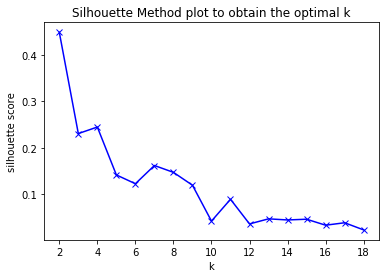

In [52]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silh = []
K_silh = range(2,19)
#  Range of clusters from 2 to the maximum number of samples (neighborhoods)
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(montreal_grouped_clustering)
    labels = kmeans.labels_
    silh.append(silhouette_score(montreal_grouped_clustering, labels, metric = 'euclidean'))

# Plot of the silhouette values against the k values    
plt.plot(K_silh, silh, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Method plot to obtain the optimal k')
plt.show()

As we can see from the chart, the maximum silhoutte score is at k=2. However, having only two clusters will not give a meaningful classification of the neighborhoods in Montreal. We can also see there is another peak at k=4. So I will move forward setting the number of clusters as 4. 

In [68]:
# setting the number of clusters
kclusters = 4

# fitting the k-means model and run the clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montreal_grouped_clustering)

# checking the cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 1, 3, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [69]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

montreal_merged = neighborhoods

# merge montreal_grouped with neighborhoods to add latitude/longitude for each neighborhood

montreal_merged = montreal_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

montreal_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
1,Pierrefonds--Roxboro,45.481054,-73.867003,1,Pizza Place,Convenience Store,Performing Arts Venue,Grocery Store,Fast Food Restaurant,Diner,Women's Store,Frozen Yogurt Shop,Donut Shop,Drugstore
2,Ahuntsic-Cartierville,45.543146,-73.680433,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
3,Cote-des-Neiges--Notre-Dame-de-Grace,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
4,Outremont,45.515644,-73.608670,1,Restaurant,Park,Bakery,Pizza Place,Metro Station,Italian Restaurant,Ice Cream Shop,Theater,American Restaurant,Farmers Market


Visualizing the resulting clusters on the map of Montreal

In [70]:
# creating the map centered around Montreal
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# setting the color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding the cluster markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montreal_merged['Latitude'], montreal_merged['Longitude'], montreal_merged['Neighborhood'], montreal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## d. Processing the Housing Data <a name="Housing"></a>

Now that the neighborhoods have been clustered, we need to include the house price data in our analysis. 

In [114]:
# loading the housing data

housing = pd.read_csv('housing.csv')

housing.head()

,Neighborhood,Average Price,5 Year Price Growth
0,Ahuntsic-Cartierville,565560,19.68%
1,Anjou,396957,4.66%
2,Beaconsfield,704917,32.33%
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729,18.11%
4,Côte-Saint-Luc,622295,17.76%


In [115]:
# sorting the data alphabetically in the housing dataset

housing.sort_values(by = ['Neighborhood'], inplace=True)
housing.head()

,Neighborhood,Average Price,5 Year Price Growth
0,Ahuntsic-Cartierville,565560,19.68%
1,Anjou,396957,4.66%
2,Beaconsfield,704917,32.33%
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729,18.11%
4,Côte-Saint-Luc,622295,17.76%


In [152]:
# sorting the data alphabetically in the clustering dataset

montreal_sorted = montreal_merged.sort_values(by = ['Neighborhood'])
montreal_sorted.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
2,Ahuntsic-Cartierville,45.543146,-73.680433,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck


In [117]:
# dropping duplicate entries

montreal_sorted.drop_duplicates(subset = 'Neighborhood', keep = "first", inplace=True)
montreal_sorted.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
12,LaSalle,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater


In [118]:
# joining the housing and the clustering dataframes

montreal_housing = montreal_sorted.join(housing.set_index('Neighborhood'), on='Neighborhood')

In [153]:
montreal_housing.head()

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,565560.0,19.68%,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,396957.0,4.66%,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729.0,18.11%,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,518800.0,NaN,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
12,LaSalle,447021.0,19.21%,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater


In [120]:
# creating columns list for rearranging the columns

cols = montreal_housing.columns.tolist()
cols

['Neighborhood',
 'Latitude',
 'Longitude',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 'Average Price',
 '5 Year Price Growth']

In [134]:
# Rearranging the columns list so average house price is next to the neighborhood column

cols = ['Neighborhood','Average Price','5 Year Price Growth', 
        'Latitude', 'Longitude','Cluster Labels','1st Most Common Venue',
        '2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue',
        '5th Most Common Venue','6th Most Common Venue','7th Most Common Venue',
        '8th Most Common Venue','9th Most Common Venue','10th Most Common Venue',
       ]

In [135]:
# confirming the order of columns
cols

['Neighborhood',
 'Average Price',
 '5 Year Price Growth',
 'Latitude',
 'Longitude',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [137]:
# arranging the columns according to the cols list

montreal_housing = montreal_housing[cols]
montreal_housing

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,565560.0,19.68%,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,396957.0,4.66%,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729.0,18.11%,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,518800.0,NaN,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
12,LaSalle,447021.0,19.21%,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater
10,Lachine,442126.0,26.22%,45.444809,-73.689583,3,Park,Restaurant,Convenience Store,Women's Store,Dessert Shop,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant
13,Mercier-Hochelaga-Maisonneuve,359739.0,14.10%,45.575953,-73.534009,1,Gym,Baseball Field,Coffee Shop,Pool,Women's Store,Furniture / Home Store,Discount Store,Donut Shop,Drugstore,Farmers Market
4,Outremont,1665210.0,NaN,45.515644,-73.608670,1,Restaurant,Park,Bakery,Pizza Place,Metro Station,Italian Restaurant,Ice Cream Shop,Theater,American Restaurant,Farmers Market
1,Pierrefonds--Roxboro,376115.0,10.05%,45.481054,-73.867003,1,Pizza Place,Convenience Store,Performing Arts Venue,Grocery Store,Fast Food Restaurant,Diner,Women's Store,Frozen Yogurt Shop,Donut Shop,Drugstore
8,Plateau-Mont-Royal,838636.0,19.59%,45.526094,-73.580749,1,Café,Bookstore,Bakery,Coffee Shop,Cocktail Bar,Creperie,Pizza Place,Bar,Tea Room,Dessert Shop


In [154]:
# dropping rows with NaN for Average house price

montreal_housing.dropna(subset = ['Average Price'], inplace=True)
montreal_housing.head()

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,565560.0,19.68%,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,396957.0,4.66%,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729.0,18.11%,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,518800.0,NaN,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
12,LaSalle,447021.0,19.21%,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater


In [155]:
# converting the house prices from string to numeric so the numbers can be processed 

montreal_housing["Average Price"] = pd.to_numeric(montreal_housing["Average Price"])
montreal_housing.head()

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,565560.0,19.68%,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,396957.0,4.66%,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729.0,18.11%,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
18,L'Ile-Bizard--Sainte-Genevieve,518800.0,NaN,45.493960,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck
12,LaSalle,447021.0,19.21%,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater


## e. Generating the choropleth map of Montreal neighborhoods by house prices and visualizing the clusters in those neighborhoods <a name="Choropleth"></a> 

In [132]:
# Loading the montreal Geojson file to generate the map

montreal_geo = r'gn-montreal.json'
montrealhousing_map = folium.Map(location = [45.4972159, -73.6103642], zoom_start = 12)

In [133]:
# code to generate the choropleth map

montrealhousing_map.choropleth(
    geo_data=montreal_geo,
    data=montreal_housing,
    columns=['Neighborhood','Average Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='House Sales Price in Montreal',
    highlight=True
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding cluster markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(montreal_housing['Latitude'], montreal_housing['Longitude'], montreal_housing['Neighborhood'], montreal_housing['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(montrealhousing_map)
   
# display map
montrealhousing_map

## f. Examine Clusters <a name="Examine"></a> 

I will now name the clusters based on their characteristics and/or location within the city. In each cluster, if possible I will analyze the housing prices between neighborhoods to suggest the locations to buy a house. 

#### Eastern end cluster

In [146]:
montreal_housing.loc[montreal_housing['Cluster Labels'] == 0, montreal_housing.columns[[0] + list(range(1, montreal_housing.shape[1]))]]

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Pointe-aux-Trembles-Rivieres-des-Prairies,312335.0,8.47%,45.658857,-73.537199,0,Tram Station,Train Station,Women's Store,Gaming Cafe,Diner,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant


The Eastern end cluster located at the Eastern tip of the island of Montreal contains a single neighborhood of Pointe-aux-Trembles-Rivieres-des-Prairies which is relatively larger in area but smaller by population. This neighborhood seems to be well connected to the city with commuter rail but has fewer choices for venues and restaurants. The average house prices are some of the lowest on the island but the 5 year price growth is also the lowest. So while it may be a good place to buy a house for someone who prefers the peace and quiet of a suburb, the return on investment may not be optimal. 

#### The city proper cluster 

In [148]:
montreal_housing.loc[montreal_housing['Cluster Labels'] == 1, montreal_housing.columns[[0] + list(range(1, montreal_housing.shape[1]))]]

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,565560.0,19.68%,45.576388,-73.662712,1,Hockey Arena,Breakfast Spot,Italian Restaurant,Liquor Store,Middle Eastern Restaurant,Park,Café,Business Service,History Museum,Train Station
9,Anjou,396957.0,4.66%,45.612503,-73.565355,1,BBQ Joint,Convenience Store,Construction & Landscaping,Motorsports Shop,Sporting Goods Shop,Women's Store,Furniture / Home Store,Donut Shop,Drugstore,Farmers Market
3,Cote-des-Neiges--Notre-Dame-de-Grace,744729.0,18.11%,45.484893,-73.631757,1,Coffee Shop,Pharmacy,Deli / Bodega,Fast Food Restaurant,Italian Restaurant,Liquor Store,Sandwich Place,Chinese Restaurant,Caribbean Restaurant,Café
12,LaSalle,447021.0,19.21%,45.428989,-73.613800,1,Department Store,Grocery Store,Pharmacy,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Discount Store,Bar,Shopping Mall,Movie Theater
13,Mercier-Hochelaga-Maisonneuve,359739.0,14.10%,45.575953,-73.534009,1,Gym,Baseball Field,Coffee Shop,Pool,Women's Store,Furniture / Home Store,Discount Store,Donut Shop,Drugstore,Farmers Market
4,Outremont,1665210.0,NaN,45.515644,-73.608670,1,Restaurant,Park,Bakery,Pizza Place,Metro Station,Italian Restaurant,Ice Cream Shop,Theater,American Restaurant,Farmers Market
1,Pierrefonds--Roxboro,376115.0,10.05%,45.481054,-73.867003,1,Pizza Place,Convenience Store,Performing Arts Venue,Grocery Store,Fast Food Restaurant,Diner,Women's Store,Frozen Yogurt Shop,Donut Shop,Drugstore
8,Plateau-Mont-Royal,838636.0,19.59%,45.526094,-73.580749,1,Café,Bookstore,Bakery,Coffee Shop,Cocktail Bar,Creperie,Pizza Place,Bar,Tea Room,Dessert Shop
6,Rosemont--La-Petite-Patrie,585431.0,43.33%,45.553353,-73.580415,1,Sushi Restaurant,Sandwich Place,Grocery Store,Flower Shop,Furniture / Home Store,Diner,Discount Store,Donut Shop,Drugstore,Farmers Market
14,Saint-Laurent,606828.0,18.40%,45.498161,-73.712855,1,Women's Store,Bank,Breakfast Spot,Coffee Shop,Thai Restaurant,Furniture / Home Store,Grocery Store,Gym,Pharmacy,Fast Food Restaurant


The city proper cluster the largest cluster, containing 14 neighborhoods in total, with each of them known to have distinct cultural flavors. However, they all seem to share many physical characteristics, such as a broad choice of venues, such as restaurants, cafés, parks, grocery and convenience stores, and pizza places. The house prices, however, show a broad range. Some of the neighborhoods, such as Ville Marie (downtown) and Outremont are some of the most expensive in the city. However, we can also see that there are a few neighborhoods with affordable house prices and a strong 5 year price growth.   

Based on the analysis of venues and prices, one of the best neighborhoods to buy a house appears to be Rosemont--La-Petite-Patrie, with relatively affordable housing, a wide selection of restaurants and venues, and the strongest 5 year price growth in Montreal, making for a much larger potential return on investment.  

Buying a house in a few other neighborhoods in this also can be a good investment, most notably, Verdun--Ile-des-Soeurs, LaSalle, and Villeray-Saint-Michel-Parc-Extension. These three neighborhoods have relatively lower house prices and a stronger growth.  

Overall, this cluster contains some prime spots for buying a house for people new to the market in Montreal. 

#### Île Bizard island cluster 

In [150]:
montreal_housing.loc[montreal_housing['Cluster Labels'] == 2, montreal_housing.columns[[0] + list(range(1, montreal_housing.shape[1]))]]

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,L'Ile-Bizard--Sainte-Genevieve,518800.0,NaN,45.49396,-73.903146,2,Golf Course,Women's Store,Gaming Cafe,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck


The Île Bizard island cluster contains just one neighborhood of l'Île-Bizard--Sainte-Genevieve. A large section of this cluster is occupied by the Bois-de-l'Île-Bizard Nature Park and many golf courses, making it one of the largest green spaces in Montreal. The average house prices are higher than many of the suburbs and the 5 year price growth data was unavaible. This cluster may be a good place to buy a house for those who want to get away from the hustle of the city and closer to nature. 

#### Southwestern cluster

In [151]:
montreal_housing.loc[montreal_housing['Cluster Labels'] == 3, montreal_housing.columns[[0] + list(range(1, montreal_housing.shape[1]))]]

,Neighborhood,Average Price,5 Year Price Growth,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Lachine,442126.0,26.22%,45.444809,-73.689583,3,Park,Restaurant,Convenience Store,Women's Store,Dessert Shop,Discount Store,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant
17,Sud-Ouest,525435.0,28.71%,45.470778,-73.577176,3,Park,Construction & Landscaping,Food Truck,Women's Store,Gaming Cafe,Donut Shop,Drugstore,Farmers Market,Fast Food Restaurant,Flower Shop


The southwestern cluster contains two of the neighborhoods along the Lachine Canal. Both of them offer a wide selection of restaurants, shops, and venues, along with opportunities for outdoor activies in parks. Both neighborhoods have relatively affordable house prices and some of the strongest 5 year price growth figures in Montreal. These factors make buying a house in either of these neighborhoods a good investment with high returns.  

## 5. Discussion <a name="Discussion"></a>

My aim was to identify clusters of neighborhoods in the city of Montreal with similar charatestics using machine learning algorithms and compare the average house prices between neighborhoods to recommend places where a customer can buy a house. My analysis using k-means clustering was able to generate 4 clusters of neighborhoods. I generated map of Montreal with these clusters overlaid on top of a map showing neighborhoods by house prices. This map provides a visual reference for my analysis and can also be used by someone else to derive their own conclusions from it.   

Coupled with the average house prices and the 5 year price growth, I was able to provide a few recommendations for where to buy a house to maximize the return on investment, while being in a neighborhood with many options for dining and activities. Based on these factors in my analysis, the best neighborhoods to buy a house in Montreal seem to be in the boroughs of Rosemont--La-Petite-Patrie, Sud-Ouest, Verdun--Ile-des-Soeurs, LaSalle, and Villeray-Saint-Michel-Parc-Extension.   

While this analysis can be a starting point to make a decision about buying a house, further analysis is required to make accurate predictions about the suitability of a neighborhood for investment. Some limitations of this analysis are as follows :   
1) The average house price only considers the price of 2 bedroom house for a family of 4, while the area of the house and the amenities are not included in the dataset.   
2) The k-means algorithm only resulted in 4 clusters, which was the optimal number of clusters obtained from the silhoutte method. While 3 of the clusters were smaller and distinct, the largest cluster, the city proper cluster contained 70% of the neighborhoods. This result complicated the analysis for the cluster because the diversity of neighborhoods and a wide range oh house prices.  
3) This analysis did not include differences between the neighborhoods based on livability metrics such as crime, education, and infrastructure. These factors have a large influence on decisions regarding buying a house.  

Future analysis on this topic should involve taking these factors into account and performing the analysis with a larger number of clusters. 

## 6. Conclusion <a name="Conclusion"></a>

In this study, I generated clusters of neighborhoods in Montreal with the help of Foursquare location data of the venues in the city. This analysis was based on the distribution of venues contained within those neighborhoods. After this, I studied these clusters in conjunction with the data about average house prices and the 5 year price growth in a neighborhood. Based on this analysis, I was able to provide recommendations for a person wanting to buy a house in Montreal in a neighborhood that has a wide selection of venues and restaurants, affordable house prices, and a stronger growth potential. The main purpose of my analysis was thus to maximize the return on investment in the decision making process for the purchase of a house. Along with this ananlysis, other factors that should be considered in this decision making process are crime rates, infrastructure, educational facilities, among others.  

In conclusion, while Montreal's real estate market is affordable, more so with the current slump in house prices caused by the Covid-19 pandemic, analysis like this one may help new buyers to make an informed decision. 